<a href="https://colab.research.google.com/github/msuribec/AppliedML_Python_Coursera/blob/master/Estrategias_de_inversi%C3%B3n_en_seis_compa%C3%B1%C3%ADas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Estrategias de inversión en seis compañías

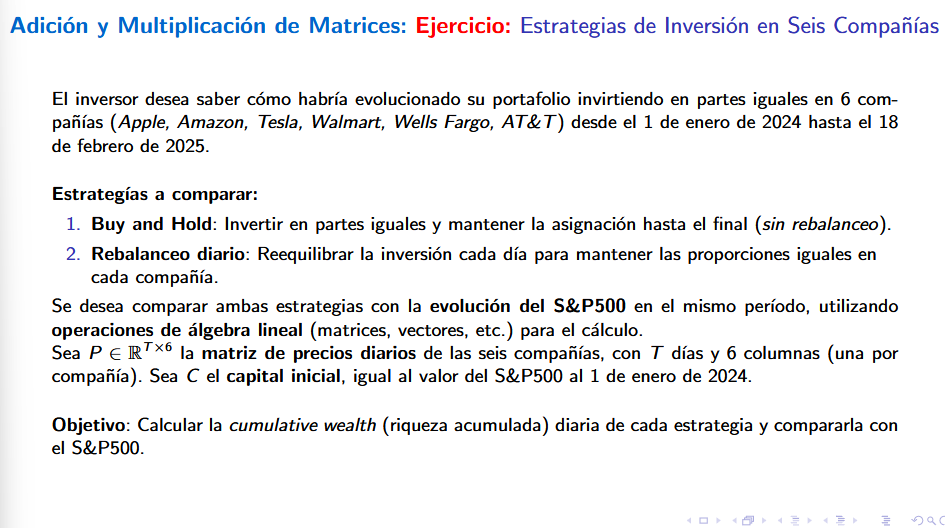

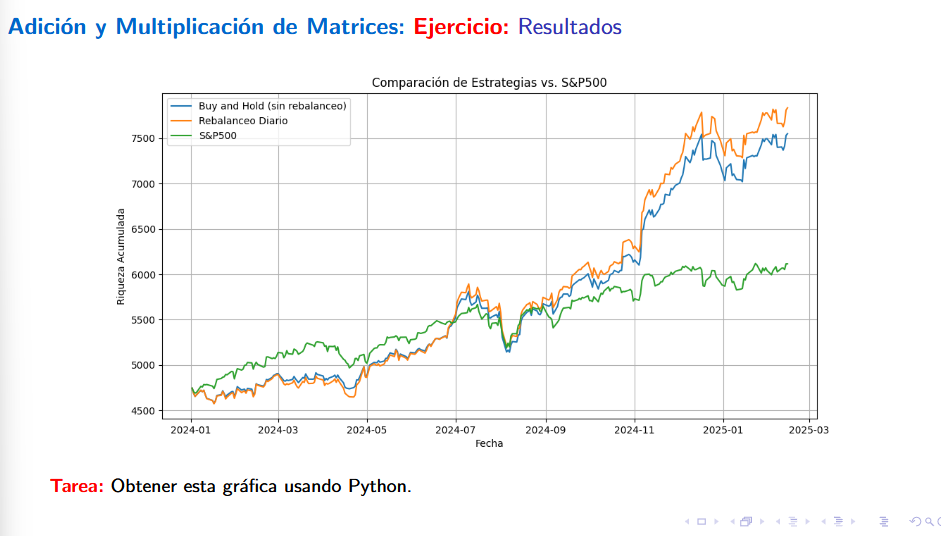

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
stocks = {
    "apple" : "AAPL",
    "amazon" : "AMZN",
    "att" : "T",
    "tesla" : "TSLA",
    "wells" : "WFC",
    "walmart" : "WMT",
    "SP500": "^GSPC"
}

In [ ]:
tickers= list(stocks.values())
tickers_stocks = [ticker for ticker in tickers if ticker != '^GSPC']

In [ ]:
date_start = "2024-01-01"
end_date = "2025-02-18"

In [ ]:
data = yf.download(tickers, start = date_start, end= end_date)['Close']

[*********************100%***********************]  7 of 7 completed


In [ ]:
data

Ticker,AAPL,AMZN,T,TSLA,WFC,WMT,^GSPC
Date,,,,,,,
2024-01-02,184.532089,149.929993,16.040480,248.419998,47.823631,52.467781,4742.830078
2024-01-03,183.150391,148.470001,16.021881,238.449997,47.193474,52.471073,4704.810059
2024-01-04,180.824341,144.570007,15.947492,237.929993,47.775150,51.963818,4688.680176
2024-01-05,180.098709,145.240005,16.245054,237.490005,48.395607,51.617966,4697.240234
2024-01-08,184.452576,149.100006,16.105572,240.449997,48.395607,52.125217,4763.540039
...,...,...,...,...,...,...,...
2025-02-10,227.649994,233.139999,24.860001,350.730011,79.099998,102.919998,6066.439941
2025-02-11,232.619995,232.759995,25.150000,328.500000,79.639999,102.470001,6068.500000
2025-02-12,236.869995,228.929993,25.360001,336.510010,79.250000,103.610001,6051.970215


In [ ]:
C = data['^GSPC'].iloc[0]
P = data.reset_index(drop=True)[tickers_stocks].to_numpy()
M, N = P.shape

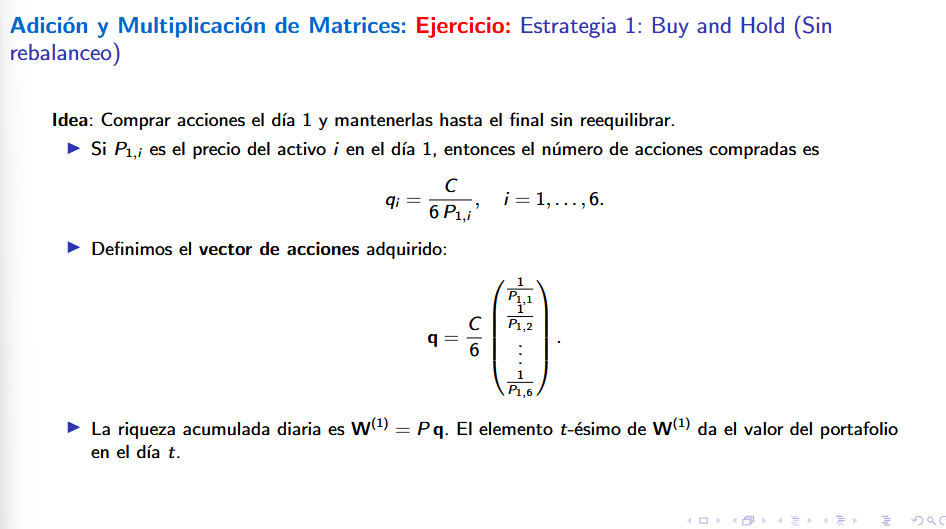

In [ ]:
A_buyhold = (C/6)/P[0,:] # Equivalente al vector q de las diapositivas
W_buyhold = P.dot(A_buyhold)

In [ ]:
A_rebalanceo = np.zeros(P.shape).T
W_rebalanceo = np.zeros((P.shape[0], 1))
A_rebalanceo[:,0] = (C/6)/P[0,:]
W_rebalanceo[0,0] = C

In [ ]:
for i in range(1, P.shape[0]):
  W_rebalanceo[i,0] = P[i,:].dot(A_rebalanceo[:,i-1])
  A_rebalanceo[:,i] = W_rebalanceo[i,0]/N/P[i,:]

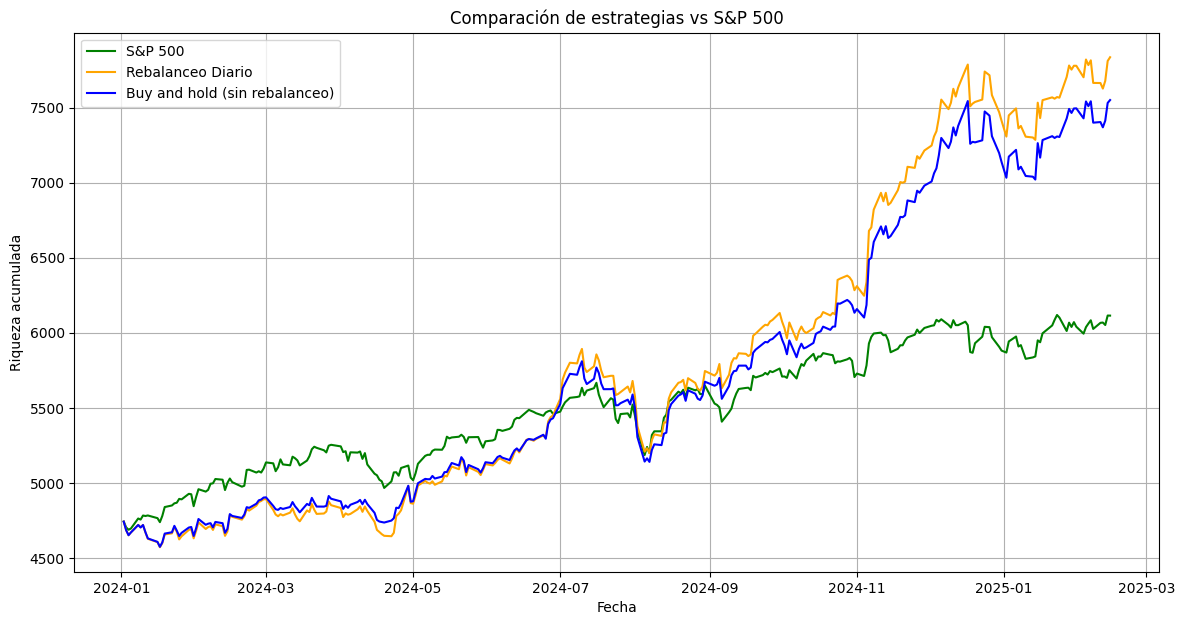

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['^GSPC'], label='S&P 500', color= 'green')
plt.plot(data.index, W_rebalanceo, label='Rebalanceo Diario', color= 'orange')
plt.plot(data.index,W_buyhold,label='Buy and hold (sin rebalanceo)', color= 'blue')

plt.xlabel("Fecha")
plt.ylabel("Riqueza acumulada")
plt.title("Comparación de estrategias vs S&P 500")
plt.legend()
plt.grid(True)
plt.show()

## Forma alternativa

In [ ]:
R = np.divide(P[1:,:],P[:-1,:]) # matriz de retornos
v = 1/N * np.ones(N)
W_rebalanceo2 = np.zeros(M)
W_rebalanceo2[0] = C

In [ ]:
# Actualizar la riqueza día a día con rebalanceo diario
for t in range(1, M):
    # r_port: retorno diario del portafolio (producto escalar)
    r_port = np.dot(v, R[t-1,:])
    W_rebalanceo2[t] = W_rebalanceo2[t-1] * r_port

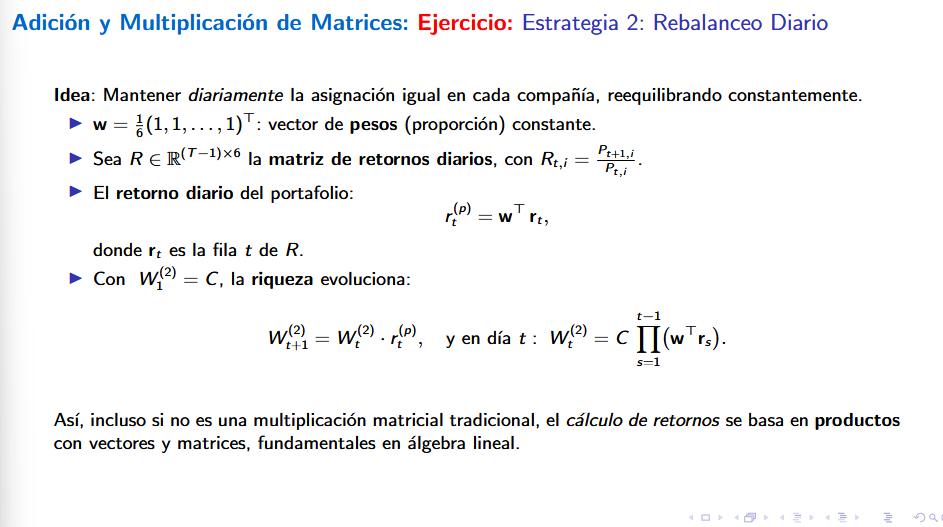

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar imagen
img = Image . open ('imagen.jpg')
# Convertir a array numpy
img_array = np . array ( img )
# Extraer canales RGB
R = img_array [: , : , 0]
G = img_array [: , : , 1]
B = img_array [: , : , 2]

In [ ]:
# Matriz de ejemplo
grayscale_matrix = np . array ([
[255 , 128 , 64] ,
[32 , 0 , 192] ,
[100 , 200 , 50]
])
# Convertir la matriz a imagen
img = Image.fromarray(grayscale_matrix.astype('uint8') , mode = 'L')
#- astype(’uint8’) convierte los valores al formato de 8 bits por p´ıxel
# Redimensionar la imagen a 400 x400
img = img.resize((400 , 400) , Image.NEAREST )
# Mostrar la imagen con Matplotlib
plt.imshow(img, cmap = 'gray')
plt.axis('off') # Quita los ejes para una visualizaci ´o n m ´a s limpia
plt.show()

NameError: name 'plt' is not defined

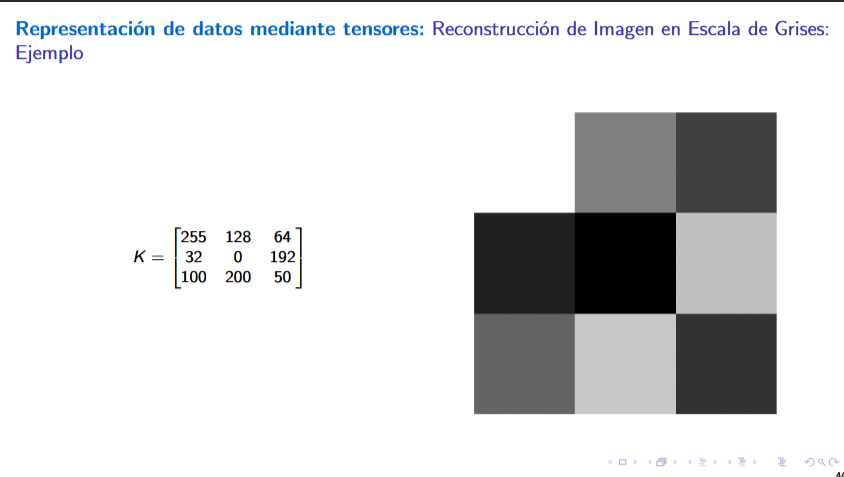![image.png]()![image.png]()

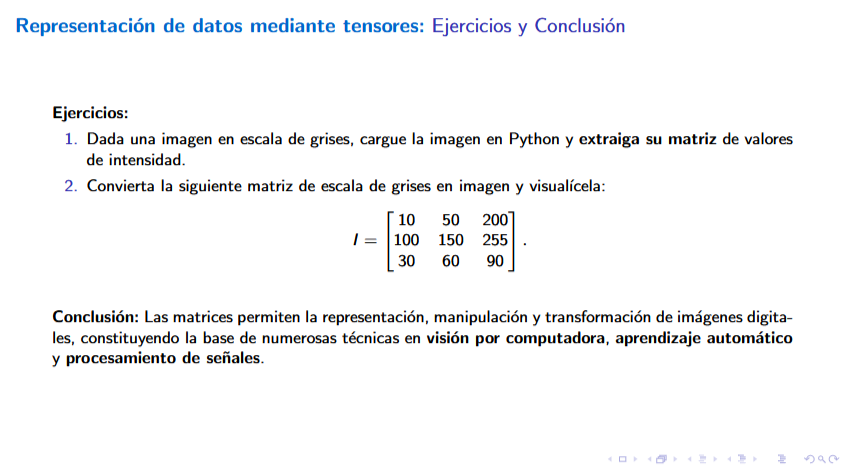

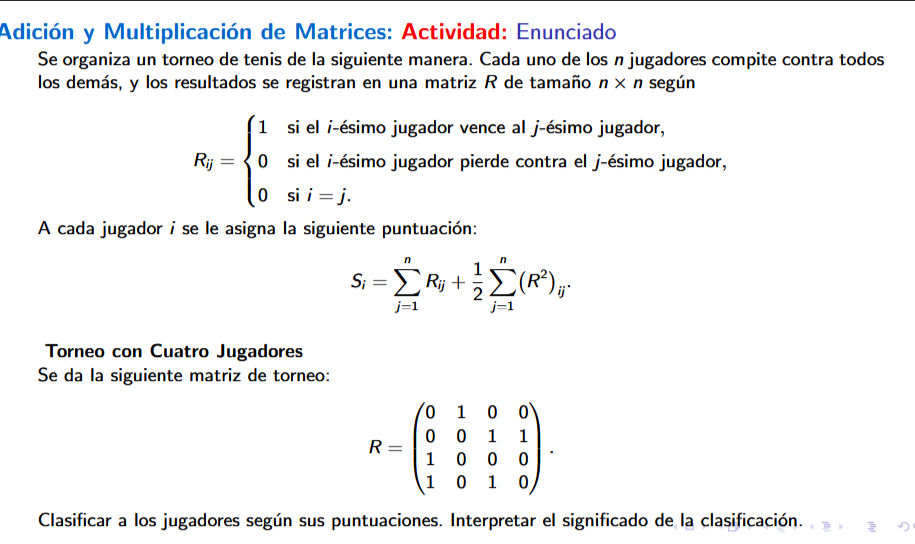

In [ ]:
# 2. Manipulación de

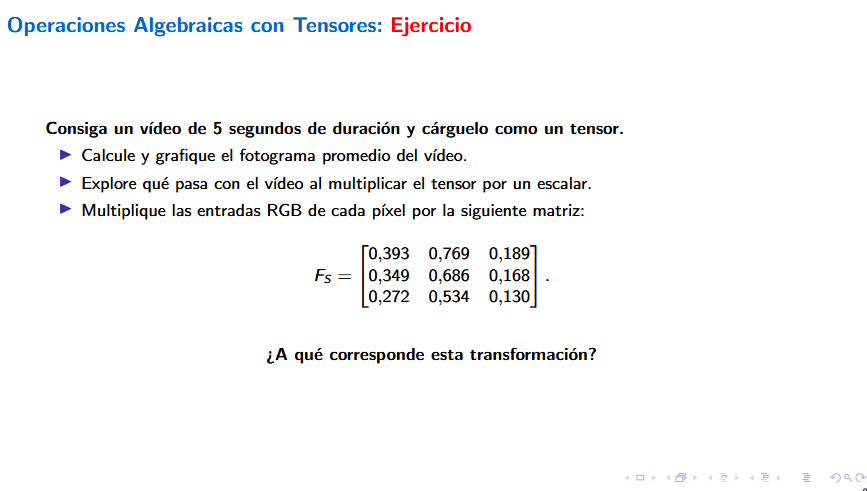